In [4]:
from IPython.display import display
from IPython.core.display import HTML 

#### Machine Learning process 

<center><img width="600px" height="600px" src="https://raw.githubusercontent.com/martinkearn/Content/master/Blogs/Images/MLProcess.PNG"></center>

In [5]:
# Import libraries needed 
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType, StringType, IntegerType, DoubleType, ArrayType

from pyspark.mllib.stat import Statistics
from pyspark.mllib.linalg import Vectors

from pyspark import AccumulatorParam
from pyspark import Broadcast

import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd

%matplotlib inline

In [6]:
#read the dataset
df = spark.read.csv('covid19.csv', inferSchema=True, header=True)
#view five records
df.show(5)

+---+---------------+---------+-------+---------------+---------+------+---------+-----------+
|SNo|ObservationDate| Province|Country|    Last_Update|Confirmed|Deaths|Recovered|Active_case|
+---+---------------+---------+-------+---------------+---------+------+---------+-----------+
|  1|     01/22/2020|    Anhui|  China|1/22/2020 17:00|        1|     0|        0|          1|
|  2|     01/22/2020|  Beijing|  China|1/22/2020 17:00|       14|     0|        0|         14|
|  3|     01/22/2020|Chongqing|  China|1/22/2020 17:00|        6|     0|        0|          6|
|  4|     01/22/2020|   Fujian|  China|1/22/2020 17:00|        1|     0|        0|          1|
|  5|     01/22/2020|    Gansu|  China|1/22/2020 17:00|        0|     0|        0|          0|
+---+---------------+---------+-------+---------------+---------+------+---------+-----------+
only showing top 5 rows



In [7]:
#print dataframe columns and count
print(df.columns)
print(df.count())

['SNo', 'ObservationDate', 'Province', 'Country', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active_case']
172480


In [8]:
df.printSchema()

root
 |-- SNo: string (nullable = true)
 |-- ObservationDate: string (nullable = true)
 |-- Province: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Last_Update: string (nullable = true)
 |-- Confirmed: integer (nullable = true)
 |-- Deaths: string (nullable = true)
 |-- Recovered: string (nullable = true)
 |-- Active_case: integer (nullable = true)



Missing records

In [9]:
from pyspark.sql.functions import isnan, when, count, col

In [10]:
#Check missing value for single column
df.filter(df['Country'].isNull()).show()

+---+---------------+--------+-------+-----------+---------+------+---------+-----------+
|SNo|ObservationDate|Province|Country|Last_Update|Confirmed|Deaths|Recovered|Active_case|
+---+---------------+--------+-------+-----------+---------+------+---------+-----------+
+---+---------------+--------+-------+-----------+---------+------+---------+-----------+



In [11]:
# Check missing value for all columns
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+---+---------------+--------+-------+-----------+---------+------+---------+-----------+
|SNo|ObservationDate|Province|Country|Last_Update|Confirmed|Deaths|Recovered|Active_case|
+---+---------------+--------+-------+-----------+---------+------+---------+-----------+
|  0|              0|       0|      0|          0|        0|     0|        0|          0|
+---+---------------+--------+-------+-----------+---------+------+---------+-----------+



In [12]:
# As there were no missing values, the number of records remains the same.
print(df.count())

172480


In [13]:
### check datatypes
df.dtypes

[('SNo', 'string'),
 ('ObservationDate', 'string'),
 ('Province', 'string'),
 ('Country', 'string'),
 ('Last_Update', 'string'),
 ('Confirmed', 'int'),
 ('Deaths', 'string'),
 ('Recovered', 'string'),
 ('Active_case', 'int')]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5D955A3A0>,
      dtype=object)

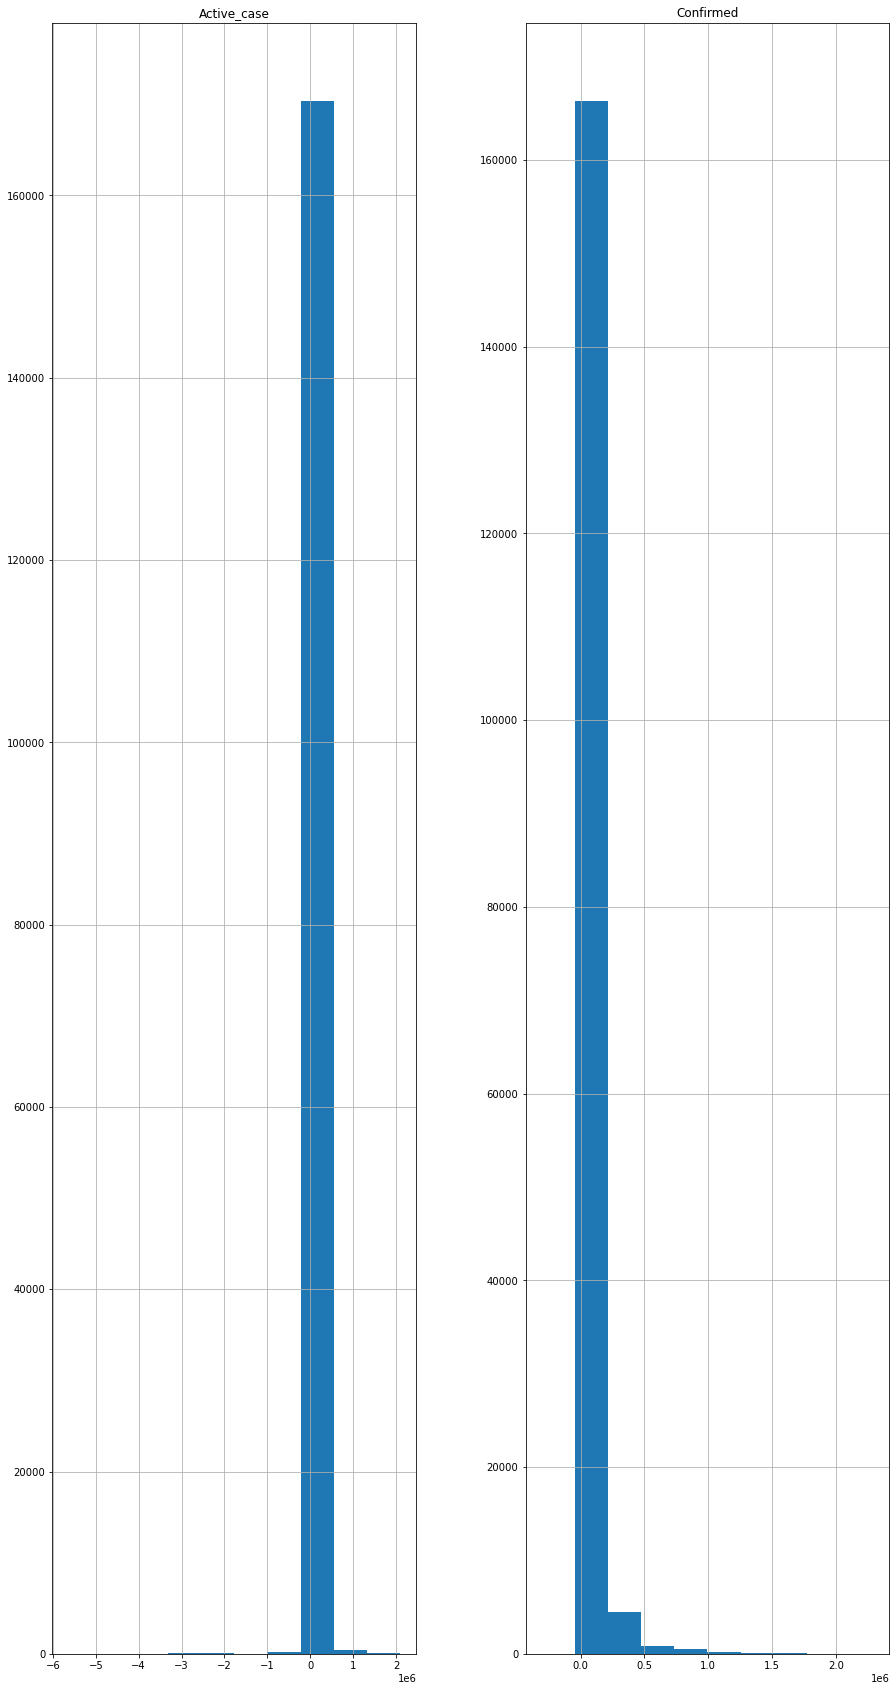

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from matplotlib import rcParams#Size of plots 
import plotly as py
import cufflinks
from tqdm import tqdm_notebook as tqdm
data = df.toPandas()
data.hist(figsize=(15,30))

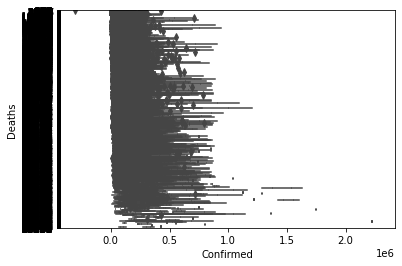

In [33]:
sns.boxplot(x="Confirmed" , y="Deaths" , data=data)

In [38]:
pd.crosstab(data['Confirmed'] , data['Deaths'])

Deaths,-154,-178,0,1,"1""",10,100,1000,10001,1001,...,9985,9987,9988,999,9990,9991,9992,9993,9994,9996
Confirmed,,,,,,,,,,,,,,,,,,,,,
-302844,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,1,2493,330,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1503,46,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,506,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,638,59,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2255912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2267019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


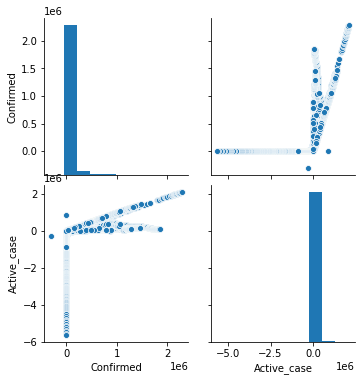

In [39]:
sns.pairplot(data)

In [40]:
data.cov()

,Confirmed,Active_case
Confirmed,1.063681e+10,4.898514e+09
Active_case,4.898514e+09,1.284470e+10


In [41]:
corr = data.corr()
corr

,Confirmed,Active_case
Confirmed,1.000000,0.417779
Active_case,0.417779,1.000000


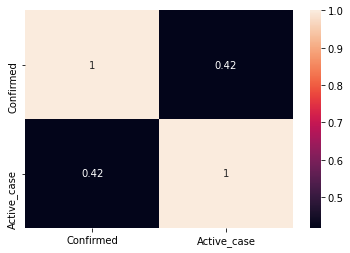

In [42]:
sns.heatmap(corr , annot=True)

In [43]:
data.drop(['ObservationDate','Province' , 'Country' , 'Last_Update'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(data.shape)

(172480, 5)


In [44]:

# split the dataset into train and test
# --------------------------------------
train, test = train_test_split(data, test_size = 0.3)
print(train.shape)
print(test.shape)

(120736, 5)
(51744, 5)


In [45]:
# split the train and test into X and Y variables
# ------------------------------------------------
train_x = train.iloc[:,0:1]; train_y = train.iloc[:,1]
test_x  = test.iloc[:,0:1];  test_y = test.iloc[:,1]
print(train_x)
print(test_x)

           SNo
147933  147934
25802    25803
165796  165797
14452    14453
111717  111718
...        ...
96435    96436
160537  160538
171998  171999
47813    47814
138015  138016

[120736 rows x 1 columns]
           SNo
51714    51715
45223    45224
84813    84814
78890    78891
86847    86848
...        ...
131013  131014
27192    27193
29212    29213
104870  104871
17546    17547

[51744 rows x 1 columns]


In [46]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(120736, 1)
(120736,)
(51744, 1)
(51744,)


In [47]:
train_y.head()

147933     40022
25802     149435
165796     94980
14452       1245
111717      5780
Name: Confirmed, dtype: int32

In [48]:
train_x.head()

,SNo
147933,147934
25802,25803
165796,165797
14452,14453
111717,111718


In [49]:
train.head()

,SNo,Confirmed,Deaths,Recovered,Active_case
147933,147934,40022,1284,37823,915.0
25802,25803,149435,4140,109962,35333.0
165796,165797,94980,3153,69226,22601.0
14452,14453,1245,26,0,1219.0
111717,111718,5780,218,4371,1191.0


In [50]:
train.tail()

,SNo,Confirmed,Deaths,Recovered,Active_case
96435,96436,105429,5741,26203,73485.0
160537,160538,14231,347,0,13884.0
171998,171999,13295,323,12317,655.0
47813,47814,170,10,155,5.0
138015,138016,5553,61,4887,605.0


In [51]:
train.dtypes

SNo             object
Confirmed        int32
Deaths          object
Recovered       object
Active_case    float64
dtype: object

In [56]:
#lm1 = sm.OLS(train_y, train_x).fit()
#pdct1 = lm1.predict(test_x)
#print(pdct1)

In [57]:
#actual = list(test_y.head(5))
#type(actual)
#predicted = np.round(np.array(list(pdct1.head(5))),2)
#print(predicted)
#type(predicted)
#data_results = pd.DataFrame({'actual':actual, 'predicted':predicted})
#print(data_results)

In [81]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time
data.head(1)

,SNo,Confirmed,Deaths,Recovered,Active_case
0,1,1,0,0,1.0


In [1]:
#X = data.drop(['Deaths'], axis=1)
#y = data.Deaths

In [2]:
#Standardize Data
#scaler = StandardScaler()
#X=StandardScaler().fit_transform(X.values)
#X = pd.DataFrame(X)
#X.columns=(data.drop(['Deaths'], axis= 1)).columns

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data_1 = df[ df["Country"] =="Tunisia"]
data = data_1.toPandas()

In [38]:
x = np.array(data.loc[:,"Confirmed"]).reshape(-1,1)
y = np.array(data.loc[:,"Deaths"]).reshape(-1,1)

In [39]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(x,y)
y_head = linReg.predict(x)

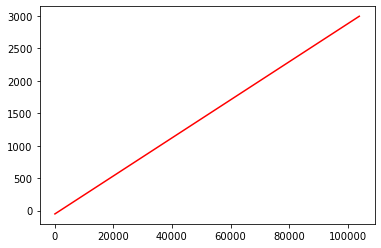

In [40]:
#Scatter

plt.plot(x,y_head,color="red")
#plt.scatter(x,y)
plt.xlabel="confirmed"
plt.ylabel="death"
plt.show()

In [41]:
#predict by any number of confirmed
y_ = linReg.predict([[6000]])
print("number of people who died as a result of diagnosis:",y_)

number of people who died as a result of diagnosis: [[124.84299964]]


In [42]:
# Evaluating how accurate the predictin made is RSQUARE

from sklearn.metrics import r2_score 
print("rscore: ",r2_score(y,y_head))

rscore:  0.9485607562346182


Polynomial Linear Regression

In [47]:

df1 = spark.read.csv("covid19_10.csv", header=True, inferSchema=True)
data = df1.toPandas()

In [48]:
x = np.array(data["Deaths"]).reshape(-1,1)
y = np.array(data["Confirmed"]).reshape(-1,1)

In [49]:
from sklearn.preprocessing import PolynomialFeatures

polyReg = PolynomialFeatures(degree=2)

x_poly = polyReg.fit_transform(x)

linReg = LinearRegression()

linReg.fit(x_poly,y)

y_head = linReg.predict(x_poly)

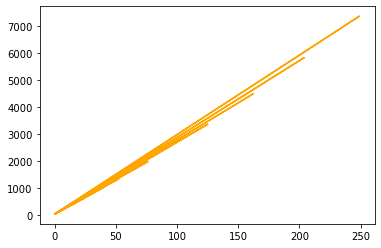

In [50]:
plt.plot(x,y_head,color="orange")
plt.show()

Desicion Tree Regression

In [59]:


x = np.array(data["Deaths"]).reshape(-1,1)
y = np.array(data["Confirmed"]).reshape(-1,1)

x_2 = x[10000:11000]
y_2 = y[10000:11000]

In [60]:
data.head(5)

,SNo,Confirmed,Deaths,Recovered
0,1,1,0,0
1,2,14,0,0
2,3,6,0,0
3,4,1,0,0
4,5,0,0,0
